<a href="https://colab.research.google.com/github/SpeedKillsx/TPs-Traitement-et-Analyse-D-images/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 : Echantillonage et Quantification
Réalisé  par :

- **LABCHRI Amayas**

- **KOULAL Yidhir Aghiles**

- **Baroud Yasmine**

- **Abci Fatima**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Importation des librairies

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#Importation des fichiers

In [ ]:
outfile1 = '/content/drive/MyDrive/TAI_ressources/lines1.npy'
outfile2 = '/content/drive/MyDrive/TAI_ressources/Cols1.npy'
outfile3 = '/content/drive/MyDrive/TAI_ressources/amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

#Affichage de l'image 

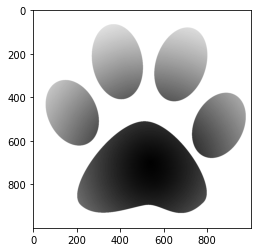

In [ ]:
plt.imshow(amplitude, cmap="gray")

In [ ]:
h, l = amplitude.shape[0], amplitude.shape[1] # obtenir les dimensions
mat = np.array # création d'un object numpy
steps = 5 # saut
mat = amplitude[0:h:steps,0:l:steps] # on parcourt la matrice amplitude avec un saut de 5 cases

# Affichage de la matrice "mat"

In [ ]:
mat # valeur allant de 0 à 1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#Affichage de l'image echantillonner 

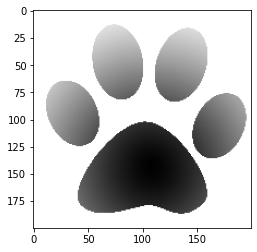

In [ ]:
plt.imshow(mat, cmap="gray")

#Quantification

In [ ]:
type(mat)

numpy.ndarray

In [ ]:
nBits = 4
L = pow(2,nBits)

In [ ]:
L

16

In [ ]:
new_Height , new_Width = mat.shape # calcul des nouvelles dimensions de la matrice echantillonner 

In [ ]:
new_Height, new_Width

(200, 200)

In [ ]:
mat_q = np.zeros((200,200)) # creation d'une matrice 200x200 remplit de 0

In [ ]:
mat_q = np.round(mat[0:new_Height:1,0:new_Width:1]*L-1) #multiplication par le nombre de bits - 1 (15) puis faire un round (mettre la valeur en entier)

#Affichage de l'image après quantification

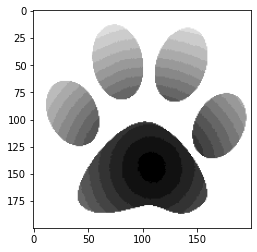

In [ ]:
plt.imshow(mat_q, cmap="gray")

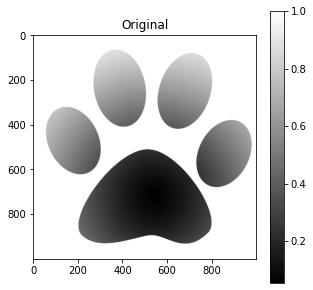

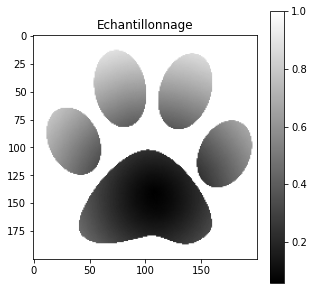

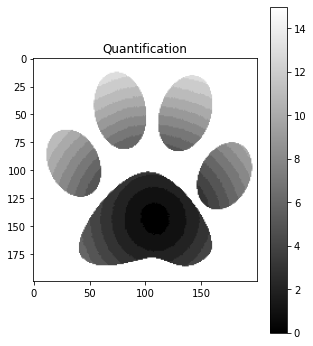

In [ ]:
# Afficher 3 images en vertical
# Image original
f1 = plt.figure(1, (5,5))
plt.imshow(amplitude, cmap="gray")
plt.title("Original")
plt.colorbar()
# Apres avoir appliquer l'échantillonage
f2 = plt.figure(2, (5,5))
plt.imshow(mat, cmap="gray")
plt.title("Echantillonnage")
plt.colorbar()
# Ici c'est apres la quantification
f3 = plt.figure(3, (5,6))
plt.title("Quantification")
plt.imshow(mat_q, cmap="gray")
plt.colorbar()
plt.show()


# Sauvgarde

In [ ]:
plt.imsave("resultat.png", mat_q, cmap='gray')

# Afficher toAdd

In [ ]:
# lecture de l'image en niveau de gris
img = cv.imread('/content/drive/MyDrive/TAI_ressources/toAdd.bmp',0)

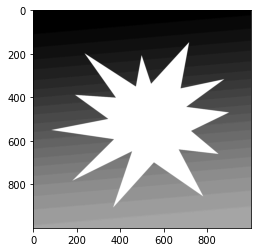

In [ ]:
# afficher avec matplotlib
plt.imshow(img, cmap="gray")

#Addition

In [ ]:
img= cv.resize(img,(200,200)) # redimensionner img
add = np.zeros((200,200)) # creation d'une matrice de 200x200 remplit de 0
for c in range(200):
    for d in range(200):
        r = img[c][d] + mat_q[c][d]
        if r > 255 : # cas ou l'addition donne un pixel > 255 on le remet a 255
            add[c][d] = 255
        elif r < 0 : # cas ou l'addition donne un pixel < 0on le remet a 0
            add[c][d] = 0
        else : # si la valeur appartient à [0-255] on ne fait pas de traitement
            add[c][d] = r

#Afficher l'addition
on remarque que c'est l'image "toAdd" mais aussi la presence des pattes autour du blanc

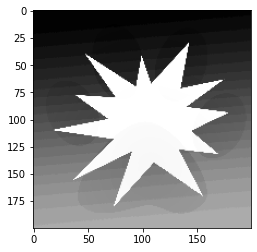

In [ ]:
plt.imshow(add, cmap="gray")

#Negatif des images "toAdd" et "resultat"

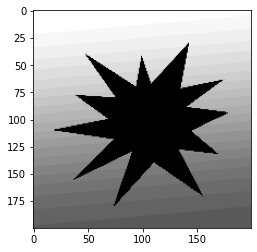

In [ ]:
plt.imshow(255-img, cmap="gray")

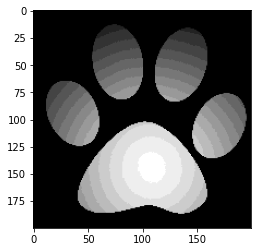

In [ ]:
plt.imshow(255-mat_q, cmap="gray")